# Check Tnsorflow version and GPU

In [1]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("List of GPUs:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.10.0
Num GPUs Available: 1
List of GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Import libraries and Path

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


# Set dataset path here

In [5]:
DATASET_PATH = "D:/Prodigy_InfoTech/Prodigy_InfoTech_Assesment_04/archive/leapGestRecog/leapGestRecog"

# Load Images and Labels

In [ ]:
def load_dataset(dataset_path):
    
    images = []
    labels = []

    for user_folder in os.listdir(dataset_path):
        user_path = os.path.join(dataset_path, user_folder)
        if not os.path.isdir(user_path):
            continue

        for gesture_folder in os.listdir(user_path):
            gesture_path = os.path.join(user_path, gesture_folder)
            if not os.path.isdir(gesture_path):
                continue

            for img_file in os.listdir(gesture_path):
                img_path = os.path.join(gesture_path, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 
                img = cv2.resize(img, (64, 64)) 
                images.append(img)
                labels.append(gesture_folder)

    return np.array(images), np.array(labels)

print("🔍 Loading data...")
X, y = load_dataset(DATASET_PATH)

🔍 Loading data...


# Preprocess data

In [ ]:
X = X / 255.0 
X = X.reshape(-1, 64, 64, 1)  
lb = LabelBinarizer()
y = lb.fit_transform(y) 


# Split into train and test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build CNN model

In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(lb.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1

# Train the model

In [10]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/15
500/500 [==============================] - 6s 8ms/step - loss: 0.4612 - accuracy: 0.8483 - val_loss: 0.0098 - val_accuracy: 0.9983
Epoch 2/15
500/500 [==============================] - 4s 8ms/step - loss: 0.0644 - accuracy: 0.9793 - val_loss: 0.0035 - val_accuracy: 0.9998
Epoch 3/15
500/500 [==============================] - 4s 7ms/step - loss: 0.0364 - accuracy: 0.9887 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4/15
500/500 [==============================] - 4s 7ms/step - loss: 0.0287 - accuracy: 0.9899 - val_loss: 4.1972e-04 - val_accuracy: 1.0000
Epoch 5/15
500/500 [==============================] - 4s 7ms/step - loss: 0.0224 - accuracy: 0.9929 - val_loss: 0.0025 - val_accuracy: 0.9998
Epoch 6/15
500/500 [==============================] - 4s 7ms/step - loss: 0.0238 - accuracy: 0.9926 - val_loss: 6.4979e-04 - val_accuracy: 0.9998
Epoch 7/15
500/500 [==============================] - 4s 7ms/step - loss: 0.0167 - accuracy: 0.9945 - val_loss: 2.3270e-04 - val_accuracy: 1

# Evaluate and visualize

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {test_acc:.2f}")

125/125 [==============================] - 1s 5ms/step - loss: 4.5863e-05 - accuracy: 1.0000
✅ Test Accuracy: 1.00


# plot training history

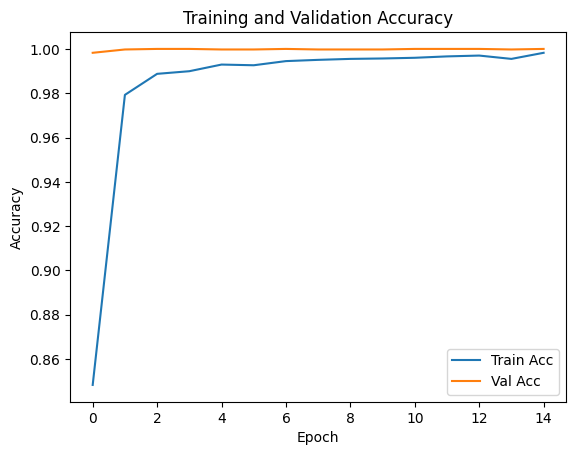

In [12]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()